### Objectives
* Introduction to Time Series Data
* Loading & handling Time Series data in Pandas
* Checking Pattern in Time Series Data
* Time Series forcasting

<hr>

### Introduction to Time Series Data
* TS data points collected at constant time intervals
* Data is time-dependent column.
* Data has seasonlity trends.

### Loading Time Series Data using Pandas

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel('/home/awantik/Downloads/Sample - Superstore.xls')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [7]:
#help(pd.read_csv)

In [8]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1316,1317,CA-2016-145919,2016-12-18,2016-12-23,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Los Angeles,...,90032,West,OFF-SU-10003505,Office Supplies,Supplies,Premier Electric Letter Opener,579.300,5,0.0,28.9650
1962,1963,CA-2017-110905,2017-09-10,2017-09-15,Second Class,RW-19690,Robert Waldorf,Consumer,United States,Springfield,...,65807,Central,OFF-BI-10002954,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,13.710,3,0.0,6.5808
8552,8553,CA-2014-140473,2014-05-30,2014-06-03,Standard Class,MC-17425,Mark Cousins,Corporate,United States,Chicago,...,60623,Central,TEC-CO-10004202,Technology,Copiers,Brother DCP1000 Digital 3 in 1 Multifunction M...,719.976,3,0.2,134.9955
3172,3173,US-2016-133879,2016-03-21,2016-03-28,Standard Class,KT-16465,Kean Takahito,Consumer,United States,Chicago,...,60623,Central,FUR-CH-10000665,Furniture,Chairs,"Global Airflow Leather Mesh Back Chair, Black",528.430,5,0.3,0.0000
1369,1370,US-2015-103471,2015-12-24,2015-12-28,Standard Class,JR-15670,Jim Radford,Consumer,United States,Colorado Springs,...,80906,West,FUR-BO-10002613,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",590.058,7,0.7,-786.7440
8270,8271,CA-2017-121790,2017-01-30,2017-02-06,Standard Class,LP-17095,Liz Preis,Consumer,United States,Aurora,...,60505,Central,OFF-AR-10003602,Office Supplies,Art,"Quartet Omega Colored Chalk, 12/Pack",9.344,2,0.2,3.1536
5934,5935,US-2017-169551,2017-07-07,2017-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,19120,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,527.920,2,0.2,85.7870
5683,5684,CA-2014-164315,2014-04-02,2014-04-08,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Athens,...,30605,South,TEC-PH-10001128,Technology,Phones,Motorola Droid Maxx,1049.930,7,0.0,293.9804
8113,8114,CA-2016-130393,2016-12-01,2016-12-03,Second Class,JM-15865,John Murray,Consumer,United States,San Angelo,...,76903,Central,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",85.246,2,0.3,-1.2178
1429,1430,US-2015-164448,2015-10-31,2015-11-04,Second Class,DK-12835,Damala Kotsonis,Corporate,United States,Salinas,...,93905,West,OFF-LA-10003510,Office Supplies,Labels,Avery 4027 File Folder Labels for Dot Matrix P...,427.420,14,0.0,196.6132


### We want to create a time series prediction for furniture

In [9]:
furniture = df[df.Category == 'Furniture']

In [10]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
Row ID           2121 non-null int64
Order ID         2121 non-null object
Order Date       2121 non-null datetime64[ns]
Ship Date        2121 non-null datetime64[ns]
Ship Mode        2121 non-null object
Customer ID      2121 non-null object
Customer Name    2121 non-null object
Segment          2121 non-null object
Country          2121 non-null object
City             2121 non-null object
State            2121 non-null object
Postal Code      2121 non-null int64
Region           2121 non-null object
Product ID       2121 non-null object
Category         2121 non-null object
Sub-Category     2121 non-null object
Product Name     2121 non-null object
Sales            2121 non-null float64
Quantity         2121 non-null int64
Discount         2121 non-null float64
Profit           2121 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 364.5

In [11]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [12]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [13]:
furniture = furniture[['Order Date', 'Sales']]

In [14]:
furniture = furniture.sort_values('Order Date')

* In TimeSeries Data, time should be index

In [15]:
furniture = furniture.set_index('Order Date')

In [16]:
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,545.9400
2014-01-13,333.9990
2014-01-14,61.9600
2014-01-16,127.1040
2014-01-19,181.4700


* Current data is messy
* We will use start of each month as a time stamp

In [17]:
y = furniture['Sales'].resample('MS').mean()

In [18]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

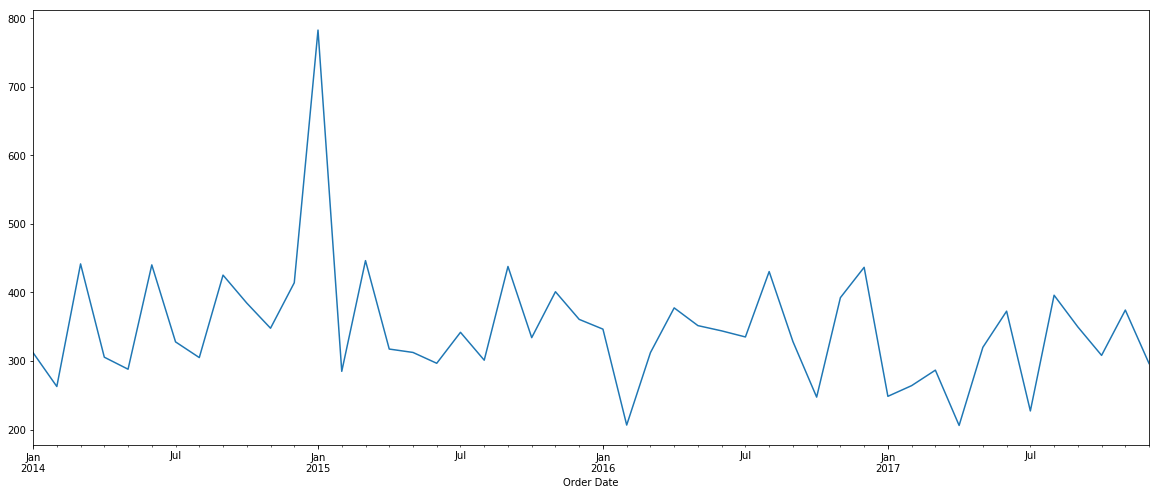

In [20]:
y.plot(figsize=(20,8))

In [3]:
import statsmodels.api as sm

In [1]:
import statsmodels

In [2]:
statsmodels.__version__

'0.11.1'

In [22]:
decom = sm.tsa.seasonal_decompose(y, model='additive')

In [26]:
from pylab import rcParams

In [28]:
rcParams['figure.figsize'] = 18,10

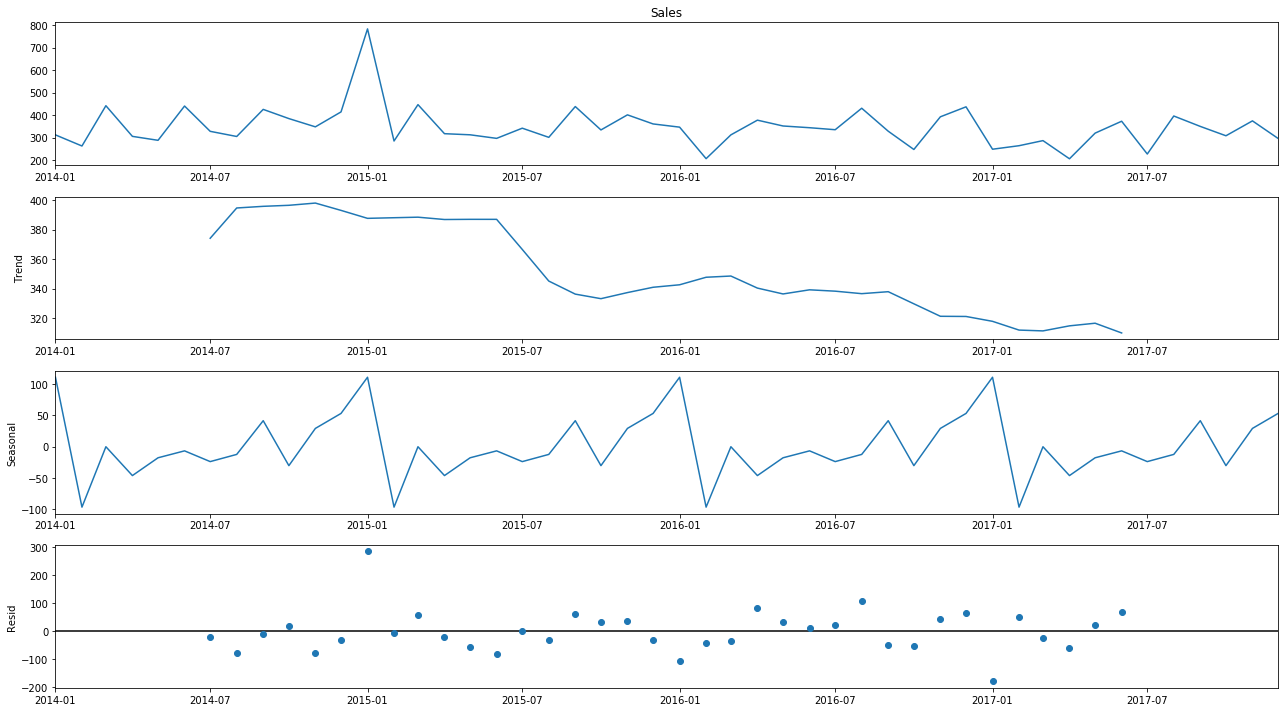

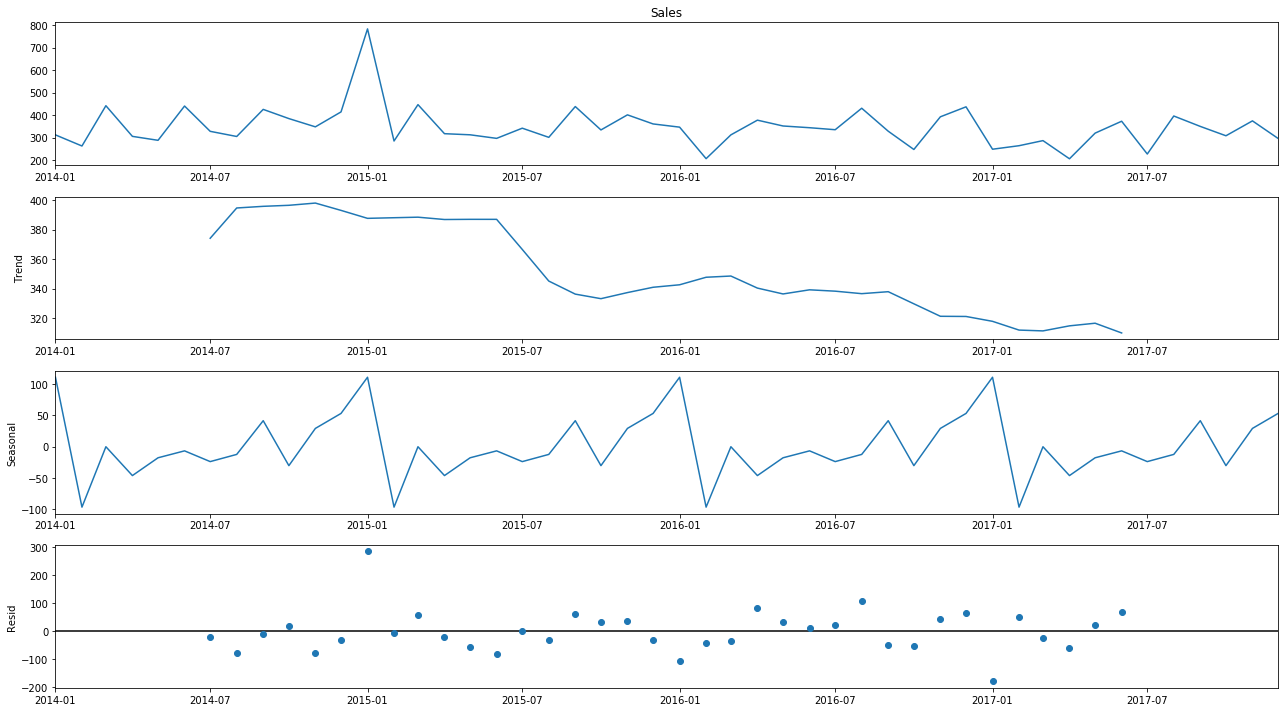

In [29]:
decom.plot()

### Conclusion about sales of furniture data
* It's unstable
* Obvious seasonality

### Time Series Forecasting using ARIMA
* ARIMA - Autoregressive Integrated Moving Average
* ARIMA is one of the simple & most often used method for time series prediction
* ARIMA consit of 3 things - p(seasonality), d(trend), q(noise)

In [32]:
### Explanation

In [30]:
p = d = q = range(0,2)

In [33]:
import itertools

In [36]:
pdq = list(itertools.product(p,d,q))

In [37]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [38]:
seasonal_pdq = [( x[0],x[1],x[2],12) for x in pdq]

In [39]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [41]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        print (param, param_seasonal, results.aic)

(0, 0, 0) (0, 0, 0, 12) 688.3112416991725


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


(0, 0, 0) (0, 0, 1, 12) 1324.3661507188137
(0, 0, 0) (0, 1, 0, 12) 426.20464898591723
(0, 0, 0) (0, 1, 1, 12) 272.091984762829
(0, 0, 0) (1, 0, 0, 12) 452.8238602501691
(0, 0, 0) (1, 0, 1, 12) 421.17561100533294
(0, 0, 0) (1, 1, 0, 12) 295.446456472235
(0, 0, 0) (1, 1, 1, 12) 274.0919845632784
(0, 0, 1) (0, 0, 0, 12) 641.1240680666111


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 0, 1) (0, 0, 1, 12) 2770.094868051153
(0, 0, 1) (0, 1, 0, 12) 416.5496453364603
(0, 0, 1) (0, 1, 1, 12) 262.52305170477035


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 0, 1) (1, 0, 0, 12) 455.1399666311057


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 0, 1) (1, 0, 1, 12) 411.5786216781468
(0, 0, 1) (1, 1, 0, 12) 297.44640662502263
(0, 0, 1) (1, 1, 1, 12) 264.5230013128143
(0, 1, 0) (0, 0, 0, 12) 580.6389269639644


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 0) (0, 0, 1, 12) 1296.1966120951458
(0, 1, 0) (0, 1, 0, 12) 433.35521367347195
(0, 1, 0) (0, 1, 1, 12) 274.1069295746927
(0, 1, 0) (1, 0, 0, 12) 437.46040107889746


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 0) (1, 0, 1, 12) 1300.2660573079893
(0, 1, 0) (1, 1, 0, 12) 294.1158452476943
(0, 1, 0) (1, 1, 1, 12) 276.1053314166441
(0, 1, 1) (0, 0, 0, 12) 538.8964721447171
(0, 1, 1) (0, 0, 1, 12) 3084.5433502012793
(0, 1, 1) (0, 1, 0, 12) 412.8726989905177
(0, 1, 1) (0, 1, 1, 12) 251.2470775508359
(0, 1, 1) (1, 0, 0, 12) 419.1839792724932


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 1) (1, 0, 1, 12) nan
(0, 1, 1) (1, 1, 0, 12) 273.4032454636578
(0, 1, 1) (1, 1, 1, 12) 253.21964764619779
(1, 0, 0) (0, 0, 0, 12) 592.7661498749849


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 0, 0) (0, 0, 1, 12) 1252.8512814633632
(1, 0, 0) (0, 1, 0, 12) 427.7241159738327
(1, 0, 0) (0, 1, 1, 12) 273.582068437108
(1, 0, 0) (1, 0, 0, 12) 420.41145389920393
(1, 0, 0) (1, 0, 1, 12) 422.2922065194194
(1, 0, 0) (1, 1, 0, 12) 273.5840395565942
(1, 0, 0) (1, 1, 1, 12) 275.5784303961399
(1, 0, 1) (0, 0, 0, 12) 553.2719417804337
(1, 0, 1) (0, 0, 1, 12) 3089.7987255063535
(1, 0, 1) (0, 1, 0, 12) 418.5261783089186
(1, 0, 1) (0, 1, 1, 12) 263.8216777113447
(1, 0, 1) (1, 0, 0, 12) 422.4003583322584
(1, 0, 1) (1, 0, 1, 12) 388.5413707667957
(1, 0, 1) (1, 1, 0, 12) 275.47757405308647
(1, 0, 1) (1, 1, 1, 12) 265.82121058782667
(1, 1, 0) (0, 0, 0, 12) 566.5211872508684


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 0) (0, 0, 1, 12) 1363.7299705795044
(1, 1, 0) (0, 1, 0, 12) 430.3305770817933
(1, 1, 0) (0, 1, 1, 12) 273.43213783259756
(1, 1, 0) (1, 0, 0, 12) 397.36689816515593


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 0) (1, 0, 1, 12) 1068.8170935523485
(1, 1, 0) (1, 1, 0, 12) 273.4415398792928
(1, 1, 0) (1, 1, 1, 12) 275.4127857749971
(1, 1, 1) (0, 0, 0, 12) 540.6257368397364
(1, 1, 1) (0, 0, 1, 12) 2511.949524294966


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 1) (0, 1, 0, 12) 414.7726173043037
(1, 1, 1) (0, 1, 1, 12) 252.6613432747537
(1, 1, 1) (1, 0, 0, 12) 391.83032555547567


/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 1) (1, 0, 1, 12) 2460.0839964598263
(1, 1, 1) (1, 1, 0, 12) 263.9371084381281
(1, 1, 1) (1, 1, 1, 12) 254.64207132026118


* (0, 1, 1) (0, 1, 1, 12) 251.2470775508359

In [42]:
model = sm.tsa.statespace.SARIMAX(y, order=(0,1,1), seasonal_order=(0,1,1,12), enforce_invertibility=False, enforce_stationarity=False)

In [43]:
results = model.fit()

/home/awantik/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -122.624
Date:                            Wed, 15 Jul 2020   AIC                            251.247
Time:                                    20:28:17   BIC                            254.381
Sample:                                01-01-2014   HQIC                           251.927
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.453     -2.207      0.027      -1.888      -0.112
ma.S.L12      -0.0141      0.171     -0.083      0.934      -0.349       0.320
sigma2      6616.8198   6.85e-05   9.66e+07      0.000    6616.820    6616.820
===================================================================================
Ljung-Box (Q):                       18.15   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.58   Prob(JB):                         0.62
Heteroskedasticity (H):               0.52   Skew:                            -0.29
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.26e+23. Standard errors may be unstable.
"""

In [45]:
### Doing the prediction

In [49]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)

In [50]:
pred.conf_int()

,lower Sales,upper Sales
Order Date,,
2017-01-01,162.940678,488.759736
2017-02-01,14.872478,340.403300
2017-03-01,124.918275,450.181393
2017-04-01,187.528103,512.544185
2017-05-01,156.670790,481.458198
2017-06-01,149.065982,473.641105
2017-07-01,143.165509,467.543036
2017-08-01,234.069772,558.262917
2017-09-01,135.529862,459.550556


In [51]:
pred.predicted_mean

Order Date
2017-01-01    325.850207
2017-02-01    177.637889
2017-03-01    287.549834
2017-04-01    350.036144
2017-05-01    319.064494
2017-06-01    311.353543
2017-07-01    305.354272
2017-08-01    396.166345
2017-09-01    297.540209
2017-10-01    217.757670
2017-11-01    364.448828
2017-12-01    407.828685
Freq: MS, dtype: float64

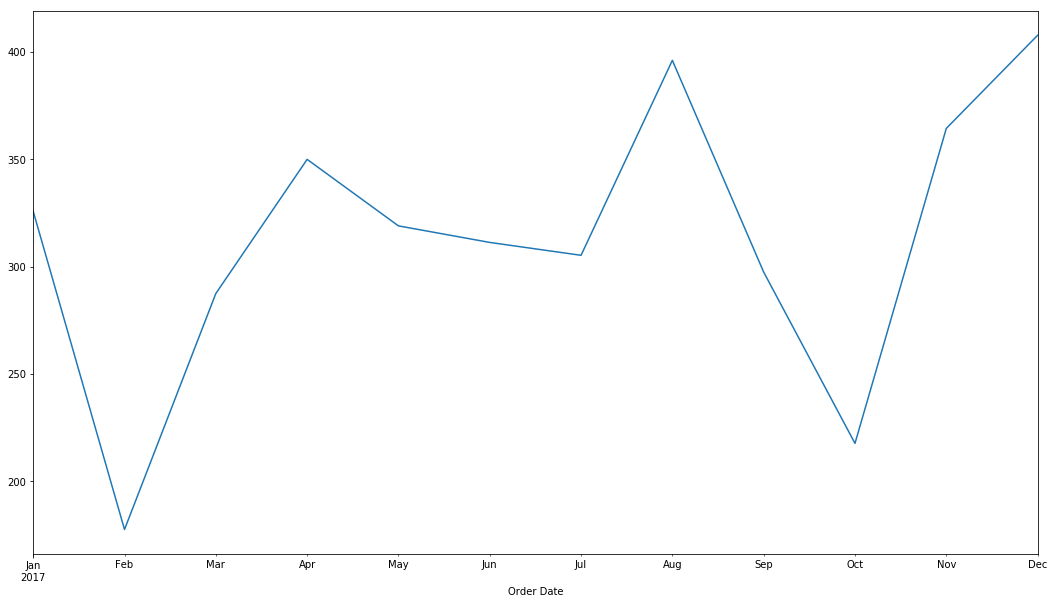

In [52]:
pred.predicted_mean.plot()

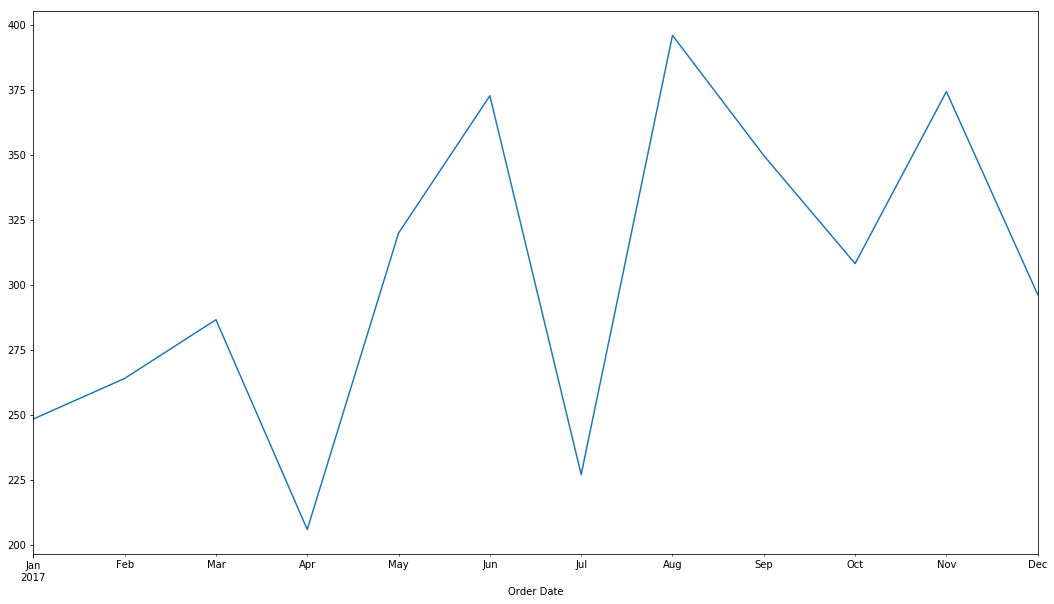

In [55]:
y['2017'].plot()

In [68]:
pred = results.get_prediction(start=pd.to_datetime('2018-02-01'), steps=10)

In [69]:
pred.conf_int()

,lower Sales,upper Sales
2018-02-01,70.600294,394.030016


In [63]:
pred.predicted_mean

2018-01-01    218.99482
Freq: MS, dtype: float64